<img style="float: left;;" src='Figures/alinco.png' /></a>
# <center> <font color= #000047> Actividad Escalamiento y transformación</font> </center>

## 1. Enunciado Ejercicio 1

En el archivo `Escalamiento.xlsx` se encuentran dos variables, las cuales se pretenden analizar para una posterior predicción.

Se entrenará una red neuronal con la variable $x_1$ usando una **función de activación sigmoidal unipolar o función signmoide, para la cual los valores de salida están siempre en el rango (0, 1)**, y la variable $x_2$ se usará para entrenar una red neuronal con una **función de activación de tangente hiperbólica, comúnmente conocida como "tanh", cuyos valores de salida están siempre en el rango (-1, 1)**.

Use el escalamiento adecuado para cada variable con la finalidad de que la red neuronal opere en el rango de cada función de activación.



## 2.  Solución Ejercicio 1

### 2.1. Importación de Librerías

* **pandas:** Manipulación y análisis de datos (datos estructurados y series temporales) en Python.
* **MinMaxScaler:** Escala características a un rango específico, normalmente (0,1), ideal para normalizar valores.
* **StandardScaler:** Estandariza características a una media de cero y varianza de uno, esencial para muchos modelos de aprendizaje automático.


In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

### 2.2. Lectura de archivo

In [3]:
df = pd.read_excel('Data/Escalamiento.xlsx')
df.head()

,x1,x2
0,6050000.0,5390000.0
1,4720000.0,700000.0
2,4460000.0,10140000.0
3,34740000.0,6600000.0
4,1910000.0,3390000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      3287 non-null   float64
 1   x2      3287 non-null   float64
dtypes: float64(2)
memory usage: 51.5 KB


In [5]:
df.describe()

,x1,x2
count,3.287000e+03,3.287000e+03
mean,3.215457e+07,1.457638e+07
std,3.948668e+07,2.910075e+07
min,3.000000e+04,1.040135e+04
25%,6.170000e+06,3.915000e+06
50%,1.612000e+07,7.950000e+06
75%,4.411500e+07,1.552500e+07
max,2.999200e+08,5.490700e+08


array([[<AxesSubplot:title={'center':'x1'}>,
        <AxesSubplot:title={'center':'x2'}>]], dtype=object)

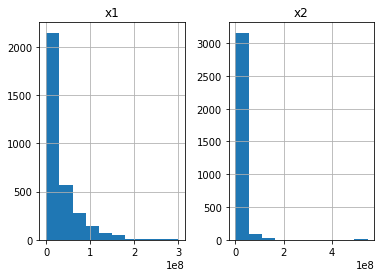

In [6]:
df.hist()

### 2.3. Escalamiento de los datos

In [9]:
# Escalamiento de x1 con función de activación Sigmoidal: de 0 a 1
scaler_sigmoid = MinMaxScaler((0,1))
x1_scaled = scaler_sigmoid.fit_transform(df[['x1']])
df['x1_transformed'] = x1_scaled
# Escalamiento de x2 con función de Tangente hiperbólica: de -1 a 1
scaler_tanh = StandardScaler()
x2_scaled = scaler_tanh.fit_transform(df[['x2']])
df['x2_transformed'] = x2_scaled

In [10]:
df.head()

,x1,x2,x1_transformed,x2_transformed
0,6050000.0,5390000.0,0.020074,-0.315723
1,4720000.0,700000.0,0.015639,-0.476912
2,4460000.0,10140000.0,0.014772,-0.152472
3,34740000.0,6600000.0,0.115742,-0.274137
4,1910000.0,3390000.0,0.006269,-0.384460


In [11]:
df.describe()

,x1,x2,x1_transformed,x2_transformed
count,3.287000e+03,3.287000e+03,3287.000000,3.287000e+03
mean,3.215457e+07,1.457638e+07,0.107121,1.824547e-17
std,3.948668e+07,2.910075e+07,0.131671,1.000152e+00
min,3.000000e+04,1.040135e+04,0.000000,-5.006123e-01
25%,6.170000e+06,3.915000e+06,0.020474,-3.664167e-01
50%,1.612000e+07,7.950000e+06,0.053653,-2.277394e-01
75%,4.411500e+07,1.552500e+07,0.147004,3.260285e-02
max,2.999200e+08,5.490700e+08,1.000000,1.836980e+01


In [16]:
#En base a la media para x2
rng = df['x2'].max() - df['x2'].min()
df_med = (df['x2']-df['x2'].mean())/ rng
df_med

0      -0.016731
1      -0.025273
2      -0.008080
3      -0.014527
4      -0.020374
          ...   
3282   -0.012324
3283    0.000389
3284   -0.011249
3285   -0.022887
3286    0.001209
Name: x2, Length: 3287, dtype: float64

In [17]:
df['x2_transformed_med'] = df_med
df

,x1,x2,x1_transformed,x2_transformed,x2_transformed_med
0,6050000.0,5390000.0,0.020074,-0.315723,-0.016731
1,4720000.0,700000.0,0.015639,-0.476912,-0.025273
2,4460000.0,10140000.0,0.014772,-0.152472,-0.008080
3,34740000.0,6600000.0,0.115742,-0.274137,-0.014527
4,1910000.0,3390000.0,0.006269,-0.384460,-0.020374
...,...,...,...,...,...
3282,13150000.0,7810000.0,0.043749,-0.232551,-0.012324
3283,8500000.0,14790000.0,0.028244,0.007342,0.000389
3284,11030000.0,8400000.0,0.036680,-0.212273,-0.011249
3285,21330000.0,2010000.0,0.071026,-0.431889,-0.022887


In [18]:
df.describe()

,x1,x2,x1_transformed,x2_transformed,x2_transformed_med
count,3.287000e+03,3.287000e+03,3287.000000,3.287000e+03,3.287000e+03
mean,3.215457e+07,1.457638e+07,0.107121,1.824547e-17,3.623089e-18
std,3.948668e+07,2.910075e+07,0.131671,1.000152e+00,5.300107e-02
min,3.000000e+04,1.040135e+04,0.000000,-5.006123e-01,-2.652895e-02
25%,6.170000e+06,3.915000e+06,0.020474,-3.664167e-01,-1.941752e-02
50%,1.612000e+07,7.950000e+06,0.053653,-2.277394e-01,-1.206859e-02
75%,4.411500e+07,1.552500e+07,0.147004,3.260285e-02,1.727723e-03
max,2.999200e+08,5.490700e+08,1.000000,1.836980e+01,9.734710e-01


### 2.4. Transformaciones de potencia

Yeo-Johnson puede manejar valores positivos y negativos, por lo tanto se puede utilizar para transformaciones de potencia de x1 y x2.

In [ ]:
# Preparación de los transformadores de potencia con Yeo-Johnson porque puede manejar valores positivos y negativos

# Aplica las transformaciones de potencia


### 2.5. Combinación de datos en un dataframe para facilidad de visualización

In [ ]:
# Combinar los datos transformados de nuevo en un dataframe para graficarlos

# Mostrar las primeras filas de datos transformados


## 3. Enunciado Ejercicio 2

En el archivo `compra_alquila.xlsx` se encuentran los datos de personas con sus ingresos, gastos comunes, estado civil, trabajo, etc.. que brindan información sobre si esa persona compró una casa o alquiló una casa. 

Con esta información, se requiere entrenar un algoritmo de machine learning que prediga si alguna persona comprará o alquilará una casa, es decir queremos que el algoritmo aprenda y que como resultado nos dé una **decisión sobre comprar (1) o alquilar (0) casa**.

Obtenga un modelo de datos aplicando codificación de variables, escalamiento y transformaciones (**obtenga histogramas y comente el método que se utilizó para la transformación de cada variable**). Seleccione las columnas de entrada $X$ y salida $Y$ para entrenar un regresor logístico con un **accuracy arriba del 80%**. Use como **salida la variable `comprar`.**

## 4. Ejercicio 2

### 4.1. Importación de Librerías

* **pandas:** Manipulación y análisis de datos (datos estructurados y series temporales) en Python.
* **StandardScaler:** Estandariza características a una media de cero y varianza de uno, esencial para muchos modelos de aprendizaje automático.
* **train_test_split**: Divide los datos en conjuntos de entrenamiento y prueba.
* **LogisticRegression**: Implementa el algoritmo de Regresión Logística para clasificación.
* **accuracy_score**: Mide la precisión de un modelo de clasificación.
* **pyplot**: Módulo de Matplotlib en Python que se usa para crear y personalizar gráficos de forma sencilla.

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

### 4.2. Lectura de archivo

In [20]:
df_2 = pd.read_csv('Data/compra_alquilar.csv')

In [21]:
df_2.head()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1


In [22]:
df_2.describe()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4958.995050,971.584158,211.742574,515.425743,38749.668317,373349.638614,1.024752,1.232673,4.490099,0.331683
std,1682.862556,272.106351,124.940754,168.103075,17365.231870,136371.525622,0.837184,1.367833,2.535794,0.471988
min,2008.000000,384.000000,0.000000,201.000000,10319.000000,176553.000000,0.000000,0.000000,0.000000,0.000000
25%,3513.750000,766.750000,99.000000,383.250000,24964.250000,274810.000000,0.000000,0.000000,2.000000,0.000000
50%,4947.500000,968.000000,208.500000,522.500000,38523.000000,340783.500000,1.000000,1.000000,5.000000,0.000000
75%,6374.500000,1165.250000,318.750000,656.750000,52150.750000,444482.000000,2.000000,2.000000,7.000000,1.000000
max,7984.000000,1585.000000,448.000000,828.000000,69934.000000,669540.000000,2.000000,4.000000,8.000000,1.000000


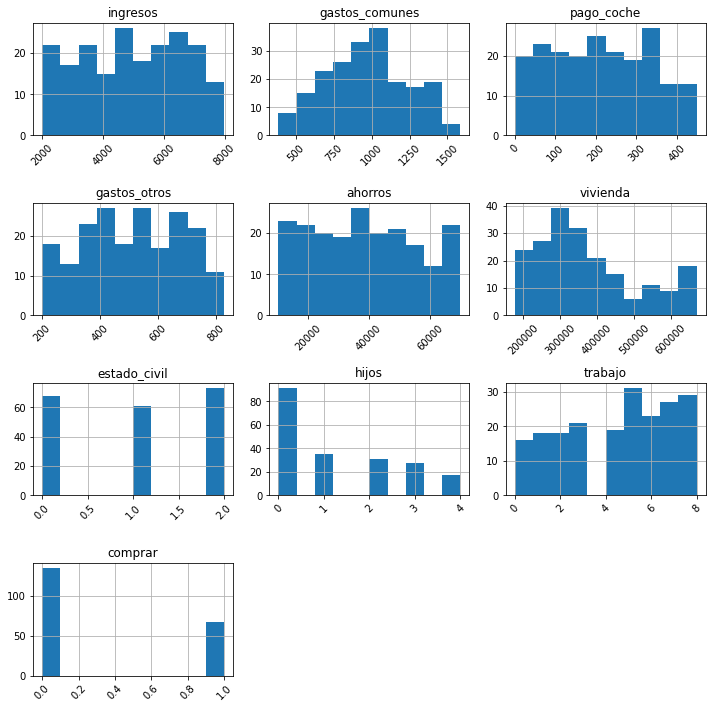

In [27]:
# Definición de parametros para graficar los histogramas y hacerlos mejor visualmente
df_2.hist(bins=10, figsize=(10,10), layout=(-1,3), xrot=45);
plt.tight_layout()
plt.show()

### 4.3. Separación de variables de entrada y salida

In [29]:
#80% train, 20%test
X = df_2.drop('comprar', axis=1)

In [30]:
X.head()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo
0,6000,1000,0,600,50000,400000,0,2,2
1,6745,944,123,429,43240,636897,1,3,6
2,6455,1033,98,795,57463,321779,2,1,8
3,7098,1278,15,254,54506,660933,0,0,3
4,6167,863,223,520,41512,348932,0,0,3


In [33]:
y=df_2['comprar']
y

0      1
1      0
2      1
3      0
4      1
      ..
197    0
198    0
199    0
200    0
201    0
Name: comprar, Length: 202, dtype: int64

### 4.4. Dividir los datos en conjuntos de entrenamiento y prueba

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=0)

### 4.5. Escalar las características

**Ingresos, gastos comunes, pago coche, otros gastos, ahorros, valor vivienda, estado civil, cantidad de hijos, trabajo**: Estas variables serán escaladas usando el método de estandarización, que reescala las características para que tengan una media de 0 y una desviación estándar de 1, lo cual es útil para la regresión logística ya que mantiene todas las variables en una escala comparable.

**Nota**: Las variables estado civil y trabajo son usualmente categóricas pero en el ejercicio fueron proporcionadas como variables numéricas y así se tratarán.

### 4.6. Crear y entrenar el modelo

In [ ]:
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train_scaled, y_train)

### 4.7. Predecir y evaluar el modelo

In [ ]:
y_pred = modelo.predict(X_train_scaled)
acc = accuracy_score(y_train, y_pred)